In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

# Load data into memory --> dataset = form of a 256×1707 matrix and contains the flattened version of 1707 16×16 grayscale handwritten digits
# from the file it is possible to load a vector I of length 1707 such that the i-th element of I is the true digit represented by the i-th image of X
data = scipy.io.loadmat('MNIST.mat')

X = data["X"]
I = data["I"].T

a = 1
b = 2
c = 3

d, N = X.shape
print(X.shape)

(256, 1707)


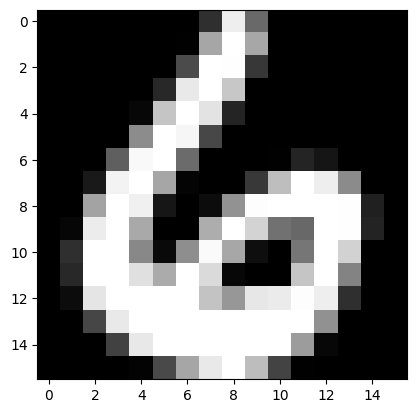

The associated digit is: [6]


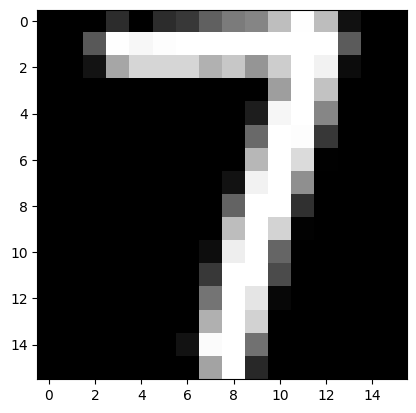

The associated digit is: [7]


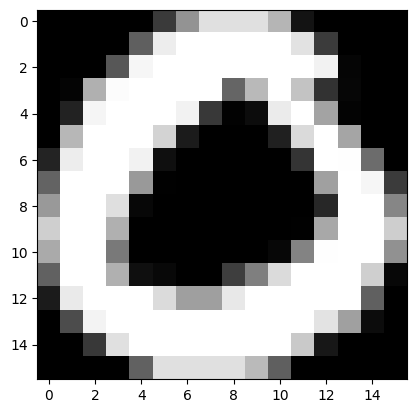

The associated digit is: [0]


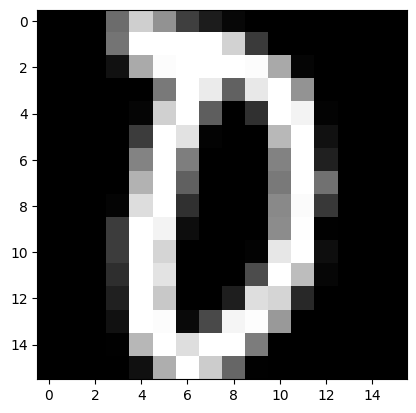

The associated digit is: [0]


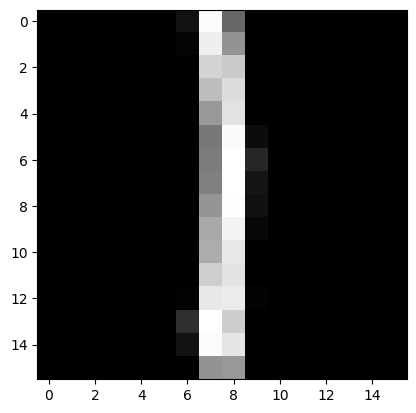

The associated digit is: [1]


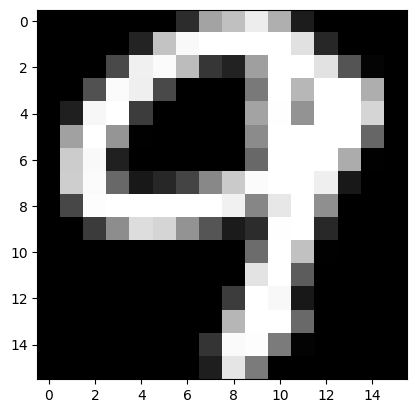

The associated digit is: [9]


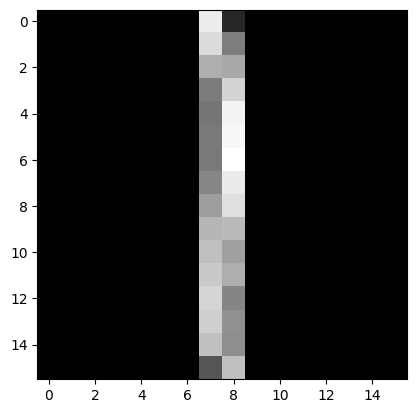

The associated digit is: [1]


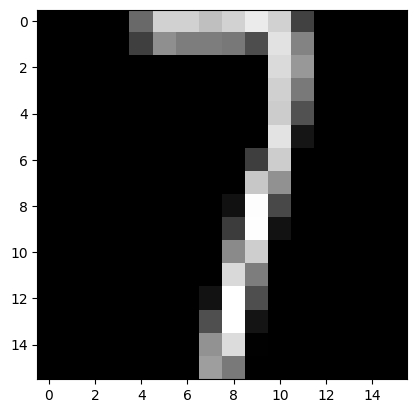

The associated digit is: [7]


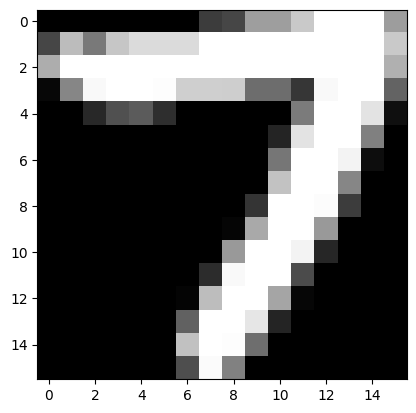

The associated digit is: [7]


In [23]:
def visualize(X, idx):
    # Visualize the image of index 'idx' from the dataset 'X'

    # Load an image in memory
    img = X[:, idx]
    
    # Reshape it 
    img = np.reshape(img, (16, 16))

    # Visualize
    plt.imshow(img, cmap='gray')
    plt.show()

# Visualize a bunch of datapoints of X 
for idx in np.arange(0, N, 200):
    visualize(X, idx)
    print(f"The associated digit is: {I[idx]}")

In [28]:
#Extract from X those columns that corresponds to digits a or b or c
idx = (I[:, 0] == a) | (I[:, 0] == b) | (I[:, 0] == c) 
I = I[idx, :]
X = X[:, idx] 

# Split the obtained dataset in training and testing.
def split_data(X, Y, Ntrain):
    d, N = X.shape

    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:Ntrain]
    test_idx = idx[Ntrain:]

    Xtrain = X[:, train_idx]
    Ytrain = Y[train_idx] #prendi solo la prima colonna
    
    Xtest = X[:, test_idx]
    Ytest = Y[test_idx]

    return (Xtrain, Ytrain), (Xtest, Ytest)

# Test it
(Xtrain, Ytrain), (Xtest, Ytest) = split_data(X, I, 200)

print(Xtrain.shape, Xtest.shape)

(256, 200) (256, 385)


In [25]:
#Create the matrices X1 and X2 and X3
idx = (Ytrain[:, 0] == a) 
Y1train = Ytrain[idx, :]
X1train = Xtrain[:, idx]

idx = (Ytrain[:, 0] == b) 
Y2train = Ytrain[idx, :]
X2train = Xtrain[:, idx]

idx = (Ytrain[:, 0] == c) 
Y3train = Ytrain[idx, :]
X3train = Xtrain[:, idx]

def SVD(M):
    U, s, VT = np.linalg.svd(M, full_matrices=False)
    return U
    
U1 = SVD(X1train)
U2 = SVD(X2train)
U3 = SVD(X3train)

print(U1.shape, U2.shape, U3.shape)

(256, 82) (256, 74) (256, 44)


In [29]:
# Take an unknown digit y from the test set 
# --> cioè prendi una immagine/riga/digit(0-9) quindi in X sapendo a che digit corrisponde/label quindi in Y
# Compute the distances d1 = ||y − y⊥1||2 and d2 = ||y − y⊥2||2 and classify y to C1 if d1 < d2 and to C2 if d2 < d1.
def distances(y, U):
    yp = U @ (U.T @ y)
    d = np.linalg.norm(y-yp)
    return d

# Repeat the experiment for different values of y in the test set and find the ACCURACY
inP = 0
num = 254 #in questo caso sto provando su tutto il testset quindi num è la dimensione del test set

for i in np.arange(num):
    # y = np.random.randint(Ytest[:, 0].shape) #-->random digit in test set
    y = i #controllo tutto il test set
    unknown = Xtest[:, y] 

    d1 = distances(unknown, U1)
    d2 = distances(unknown, U2)
    d3 = distances(unknown, U3)

    if(d1<d2): # prediction a            
        if (Ytest[y] != a): inP = inP + 1
    elif (d2<d3): # prediction b
        if (Ytest[y] != b): inP = inP + 1
    else:
        if (Ytest[y] != c): inP = inP + 1
                
print(inP, num)
print(1 - inP/num) 

# Repeat the experiment for different digits other than 3 or 4. There is a relationship between the visual similarity of 
# the digits and the classification error?
# YES

7 254
0.9724409448818898
